In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os, json

plt.rcParams['font.family'] = 'serif'
#plt.rcParams['font.serif'] = ['CMU Serif']

class_info = pd.read_csv('allflares_processed_5.csv')
#class_info = pd.read_csv('sim6/fitted_flares.csv')
filenames = [f.split('.png')[0] for f in os.listdir('plots_strict')]

#print(filenames)

data = []
data_deriv = []
labels = []
ids = []
peak_count = []
keep_ind = []

tot_flares = 0
maxlen = 0

for i, iden in enumerate(tqdm(np.array(class_info['identifier']))):
    #print(iden)
    try:
        tod = pd.read_csv('flares/' + str(iden) + '.csv')
        #tod = pd.read_csv(f'sim6/binned_flares/{iden}.csv')
    except FileNotFoundError:
        continue

    if iden not in filenames:
        continue

    keep_ind.append(i)

    #plot_flare(iden)

    if len(tod['Counts']) > maxlen:
        maxlen = len(tod['Counts'])

    tot_flares += 1
    data.append(list(tod['Counts']))
    data_deriv.append(list(np.diff(tod['Counts'])))
    peak_count.append(class_info['peak_count'][i])
    
    if class_info['flare_type'][i] == 'A':
        #plot_flare(iden)
        labels.append(0)
    else:
        labels.append(1)

    ids.append(class_info['identifier'][i])

labels = np.array(labels)

class_info_copy = class_info.loc[keep_ind].copy().reset_index(drop=True)
class_info = class_info_copy

a_inds = np.array(class_info['flare_type']) == 'A'
b_inds = np.array(class_info['flare_type']) == 'B'

print(tot_flares)

100%|███████████████████████████████████████| 404/404 [00:00<00:00, 1486.75it/s]

268


In [42]:
sim_data = class_info.copy()

a_inds_sim = np.array(sim_data['flare_type']) == 'A'
b_inds_sim = np.array(sim_data['flare_type']) == 'B'

In [44]:
print(class_info.columns)
a_inds = np.array(class_info['flare_type']) == 'A'
b_inds = np.array(class_info['flare_type']) == 'B'

print(len(a_inds[a_inds]))
print(len(b_inds[b_inds]))

Index(['date', 'identifier', 'start_time', 'start_count', 'peak_time',
       'peak_count', 'end_time', 'end_count', 'scpeaks0-05',
       'multi_flare_region_flag', 'region_resolved_flag', 'flare_class',
       'background', 'amplitude', 'mu', 'sigma', 'tau', 'redchisq', 'rsquared',
       'snr', 'fluence', 'sigma-by-tau', 'flare_type', 'duration', 'slope'],
      dtype='object')
30
238


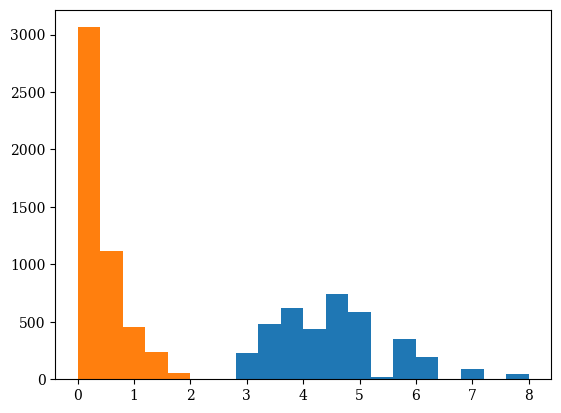

In [22]:
plt.hist(class_info['sigma-by-tau'][a_inds], bins=np.linspace(0,8,21))
plt.hist(class_info['sigma-by-tau'][b_inds], bins=np.linspace(0,8,21))

plt.show()

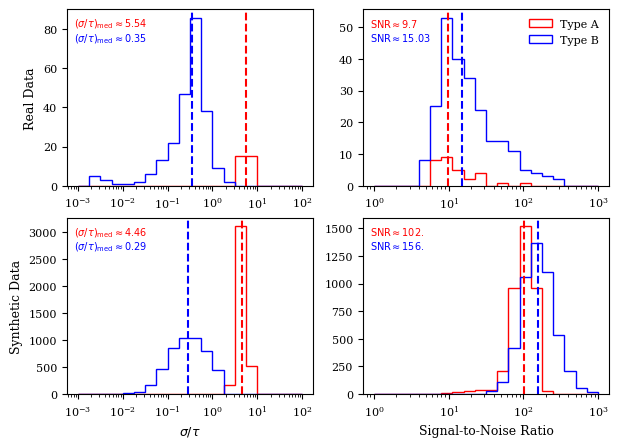

242.89499999999998
659.645
9.696081229597718
15.02858143798279


In [146]:
with open('count_snr_syn.json', 'r') as f:
    count_snr_syn = json.load(f)

with open('count_snr_real.json', 'r') as f:
    count_snr_real = json.load(f)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7, 5))

ax1.hist(class_info['sigma-by-tau'][a_inds], bins=np.logspace(-3,2,21), histtype='step', color='r', label='Type A')
ax1.hist(class_info['sigma-by-tau'][b_inds], bins=np.logspace(-3,2,21), histtype='step', color='b', label='Type B')

ax1.text(0.03, 0.9, r"$(\sigma/\tau)_\mathrm{med} \approx " + str(np.round(np.median(class_info['sigma-by-tau'][a_inds]), 2)) + '$', transform=ax1.transAxes, ha='left', fontsize=7, c='r')
ax1.text(0.03, 0.82, r"$(\sigma/\tau)_\mathrm{med} \approx " + str(np.round(np.median(class_info['sigma-by-tau'][b_inds]), 2)) + '$', transform=ax1.transAxes, ha='left', fontsize=7, c='b')

ax1.axvline(np.median(class_info['sigma-by-tau'][a_inds]), c='r', ls='--')
ax1.axvline(np.median(class_info['sigma-by-tau'][b_inds]), c='b', ls='--')

ax1.set_xscale('log')

#ax1.set_xlabel('SNR', fontsize=9)
ax1.set_ylabel('Real Data', fontsize=9)

ax1.tick_params(axis='both', which='major', labelsize=8)

#ax1.set_xticks([])

ax3.hist(sim_data['sigma-by-tau'][a_inds_sim], bins=np.logspace(-3,2,21), histtype='step', color='r', label='Type A')
ax3.hist(sim_data['sigma-by-tau'][b_inds_sim], bins=np.logspace(-3,2,21), histtype='step', color='b', label='Type B')

ax3.axvline(np.median(sim_data['sigma-by-tau'][a_inds_sim]), c='r', ls='--')
ax3.axvline(np.median(sim_data['sigma-by-tau'][b_inds_sim]), c='b', ls='--')

ax3.set_xscale('log')

ax3.set_xlabel(r'$\sigma/\tau$', fontsize=9)
ax3.set_ylabel('Synthetic Data', fontsize=9)

ax3.tick_params(axis='both', which='major', labelsize=8)

a_med = np.median(sim_data['sigma-by-tau'][a_inds_sim])
b_med = np.median(sim_data['sigma-by-tau'][b_inds_sim])

ax3.text(0.03, 0.9, r"$(\sigma/\tau)_\mathrm{med} \approx " + str(np.round(a_med, 2)) + '$', transform=ax3.transAxes, ha='left', fontsize=7, c='r')
ax3.text(0.03, 0.82, r"$(\sigma/\tau)_\mathrm{med} \approx " + str(np.round(b_med, 2)) + '$', transform=ax3.transAxes, ha='left', fontsize=7, c='b')

ax2.hist(count_snr_real['A'], bins=np.logspace(0,3,21), histtype='step', color='r', label='Type A')
ax2.hist(count_snr_real['B'], bins=np.logspace(0,3,21), histtype='step', color='b', label='Type B')

ax2.axvline(np.median(count_snr_real['A']), c='r', ls='--')
ax2.axvline(np.median(count_snr_real['B']), c='b', ls='--')

ax2.text(0.03, 0.9, r"$\mathrm{SNR} \approx " + str(np.round(np.median(count_snr_real['A']), 2)) + '$', transform=ax2.transAxes, ha='left', fontsize=7, c='r')
ax2.text(0.03, 0.82, r"$\mathrm{SNR} \approx " + str(np.round(np.median(count_snr_real['B']), 2)) + '$', transform=ax2.transAxes, ha='left', fontsize=7, c='b')

ax2.set_xscale('log')

#ax2.set_xticks([])

#ax2.set_xlabel('Peak Intensity (nW/m$^2$)', fontsize=9)

ax2.tick_params(axis='both', which='major', labelsize=8)

ax2.legend(fontsize=8, loc='upper right', frameon=False)

ax4.hist(count_snr_syn['A'], bins=np.logspace(0,3,21), histtype='step', color='r')
ax4.hist(count_snr_syn['B'], bins=np.logspace(0,3,21), histtype='step', color='b')

ax4.axvline(np.median(count_snr_syn['A']), c='r', ls='--')
ax4.axvline(np.median(count_snr_syn['B']), c='b', ls='--')

ax4.text(0.03, 0.9, r"$\mathrm{SNR} \approx " + str(int(np.round(np.median(count_snr_syn['A'])))) + '.$', transform=ax4.transAxes, ha='left', fontsize=7, c='r')
ax4.text(0.03, 0.82, r"$\mathrm{SNR} \approx " + str(int(np.round(np.median(count_snr_syn['B'])))) + '.$', transform=ax4.transAxes, ha='left', fontsize=7, c='b')

ax4.set_xscale('log')

ax4.set_xlabel('Signal-to-Noise Ratio', fontsize=9)

ax4.tick_params(axis='both', which='major', labelsize=8)

#fig.text(0.04, 0.5, 'Synthetic Data', va='center', rotation='vertical', fontsize=12)

#plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.18)

plt.savefig('biases.pdf', bbox_inches='tight', pad_inches=0.01)

plt.show()

print(np.median(class_info['snr'][a_inds]))
print(np.median(class_info['snr'][b_inds]))

print(np.median(count_err_real['A']))
print(np.median(count_err_real['B']))

#print(class_info['snr'])

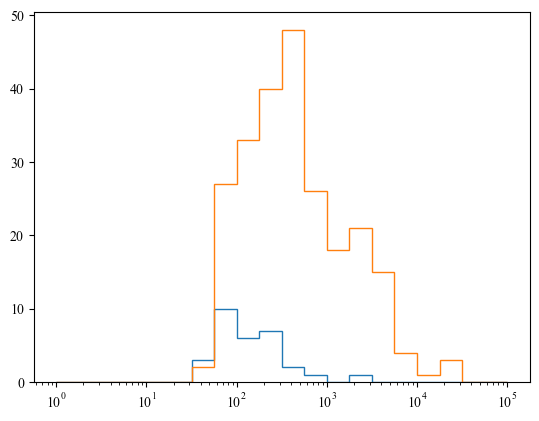

In [15]:
plt.hist(class_info['peak_count'][a_inds], bins=np.logspace(0,5,21), histtype='step')
plt.hist(class_info['peak_count'][b_inds], bins=np.logspace(0,5,21), histtype='step')

plt.xscale('log')

plt.show()

In [49]:
as_mult = len(class_info['multi_flare_region_flag'][a_inds][np.invert(np.array(class_info['multi_flare_region_flag'][a_inds]))])
bs_mult = len(class_info['multi_flare_region_flag'][b_inds][np.invert(np.array(class_info['multi_flare_region_flag'][b_inds]))])

print(as_mult)
print(bs_mult)

print(as_mult/len(class_info['multi_flare_region_flag'][a_inds]))
print(bs_mult/len(class_info['multi_flare_region_flag'][b_inds]))

30
257
1.0
1.0
